In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, precision_recall_fscore_support, classification_report
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from IPython.display import display
from sklearn.ensemble import VotingClassifier
from prettytable import PrettyTable

In [3]:
X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
y_train = pd.read_csv('UCI HAR Dataset/train/y_train.txt',header=None)

X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
y_test = pd.read_csv('UCI HAR Dataset/test/y_test.txt',header=None)

features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])

X_train.columns = features['feature_name']
X_test.columns = features['feature_name']

print("Dimensiones de los datos:")
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
X_train.head()

C:\Users\nicon\AppData\Local\Temp\ipykernel_20960\2684210714.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv('UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
C:\Users\nicon\AppData\Local\Temp\ipykernel_20960\2684210714.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv('UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)


Dimensiones de los datos:
(7352, 561)
(7352, 1)
(2947, 561)
(2947, 1)


C:\Users\nicon\AppData\Local\Temp\ipykernel_20960\2684210714.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features = pd.read_csv('UCI HAR Dataset/features.txt', delim_whitespace=True, header=None, names=['id', 'feature_name'])
C:\Users\nicon\AppData\Local\Temp\ipykernel_20960\2684210714.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  activities = pd.read_csv('UCI HAR Dataset/activity_labels.txt', delim_whitespace=True, header=None, names=['id', 'activity_name'])


feature_name,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [4]:
y_train_counts = y_train.value_counts().sort_index()
y_test_counts = y_test.value_counts().sort_index()

class_distribution = pd.DataFrame({
    "Train": y_train_counts.values,
    "Test": y_test_counts.values
}, index=activities["activity_name"])

class_distribution

,Train,Test
activity_name,,
WALKING,1226,496
WALKING_UPSTAIRS,1073,471
WALKING_DOWNSTAIRS,986,420
SITTING,1286,491
STANDING,1374,532
LAYING,1407,537


In [5]:
print("Valores nulos en X_train:", X_train.isnull().sum().sum())
print("Valores nulos en X_test:", X_test.isnull().sum().sum())

print("Rango de valores en X_train:")
X_train.describe().T[['min', 'max']]

Valores nulos en X_train: 0
Valores nulos en X_test: 0
Rango de valores en X_train:


,min,max
feature_name,,
tBodyAcc-mean()-X,-1.000000,1.000000
tBodyAcc-mean()-Y,-1.000000,1.000000
tBodyAcc-mean()-Z,-1.000000,1.000000
tBodyAcc-std()-X,-1.000000,1.000000
tBodyAcc-std()-Y,-0.999873,0.916238
...,...,...
"angle(tBodyGyroMean,gravityMean)",-1.000000,0.998702
"angle(tBodyGyroJerkMean,gravityMean)",-1.000000,0.996078
"angle(X,gravityMean)",-1.000000,1.000000


In [6]:
acc_features = X_train.filter(regex="Acc")
gyro_features = X_train.filter(regex="Gyro")

low_variance_features = X_train.var()[X_train.var() < 0.01]

print("Acelerómetro - Media Global:", acc_features.mean().mean())
print("Giroscopio - Media Global:", gyro_features.mean().mean())
print("Cantidad de características con baja varianza:", len(low_variance_features))

low_variance_features

Acelerómetro - Media Global: -0.5087652484356199
Giroscopio - Media Global: -0.5125882938368747
Cantidad de características con baja varianza: 37


feature_name
tBodyAcc-mean()-X                   0.004937
tBodyAcc-mean()-Y                   0.001665
tBodyAcc-mean()-Z                   0.003208
tGravityAcc-std()-X                 0.006084
tGravityAcc-std()-Y                 0.008366
tGravityAcc-mad()-X                 0.005887
tGravityAcc-mad()-Y                 0.008180
tGravityAcc-iqr()-X                 0.005378
tGravityAcc-iqr()-Y                 0.007570
fBodyAcc-bandsEnergy()-25,32        0.007780
fBodyAcc-bandsEnergy()-33,40        0.007159
fBodyAcc-bandsEnergy()-33,48        0.009689
fBodyAcc-bandsEnergy()-25,48        0.007824
fBodyAccJerk-bandsEnergy()-57,64    0.003367
fBodyAccJerk-bandsEnergy()-57,64    0.008928
fBodyAccJerk-bandsEnergy()-25,32    0.007487
fBodyAccJerk-bandsEnergy()-33,40    0.006514
fBodyAccJerk-bandsEnergy()-33,48    0.009088
fBodyAccJerk-bandsEnergy()-25,48    0.007637
fBodyGyro-bandsEnergy()-25,32       0.007621
fBodyGyro-bandsEnergy()-41,48       0.009440
fBodyGyro-bandsEnergy()-49,56       0.0072

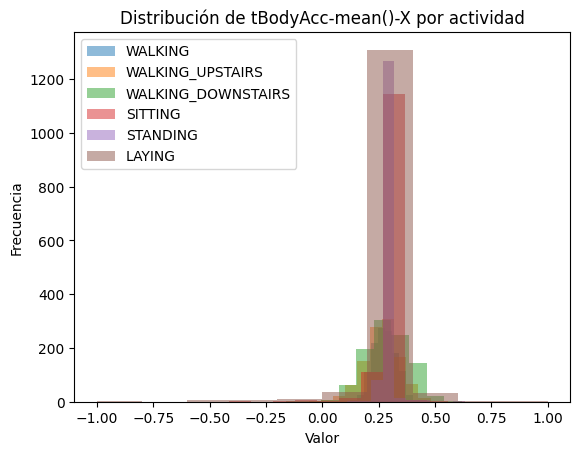

In [7]:
sample_feature = X_train.columns[0]

plt.figure()
for i, act in enumerate(activities["id"], 1):
    plt.hist(X_train[y_train[0] == act][sample_feature], alpha=0.5, label=activities["activity_name"][i-1])

plt.legend()
plt.title(f"Distribución de {sample_feature} por actividad")
plt.xlabel("Valor")
plt.ylabel("Frecuencia")
plt.show()


C:\Users\nicon\AppData\Local\Temp\ipykernel_20960\3032735845.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=activities["activity_name"], showfliers=False)


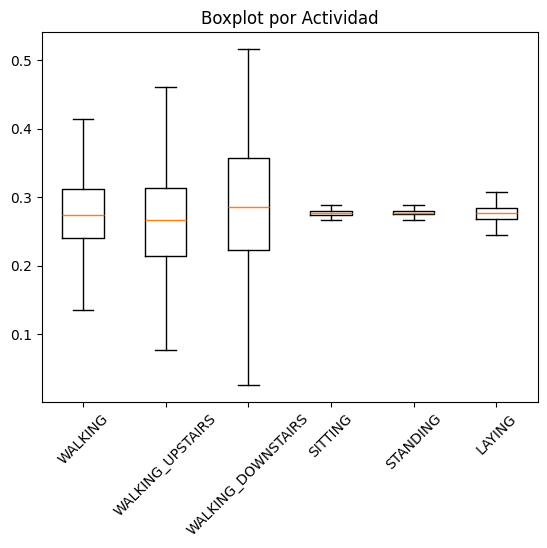

In [8]:
plt.figure()
data = [X_train[y_train[0] == act][sample_feature] for act in activities["id"]]
plt.boxplot(data, labels=activities["activity_name"], showfliers=False)
plt.xticks(rotation=45)
plt.title("Boxplot por Actividad")
plt.show()


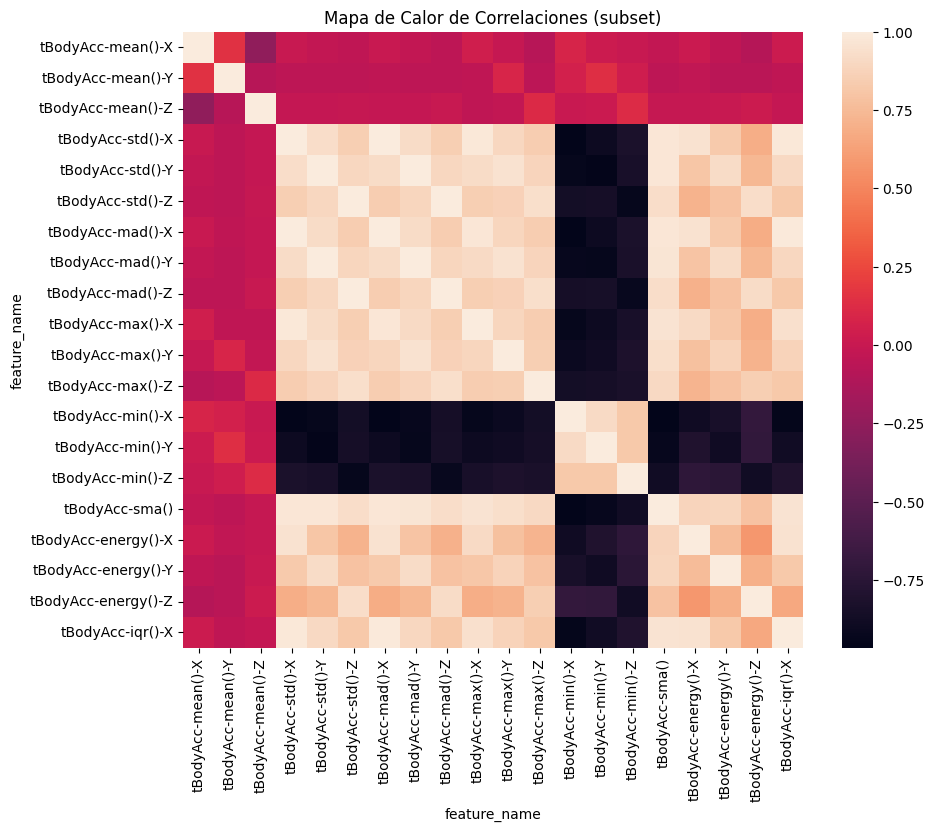

In [9]:
subset = X_train.iloc[:, :20]
corr_matrix = subset.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix)
plt.title("Mapa de Calor de Correlaciones (subset)")
plt.show()


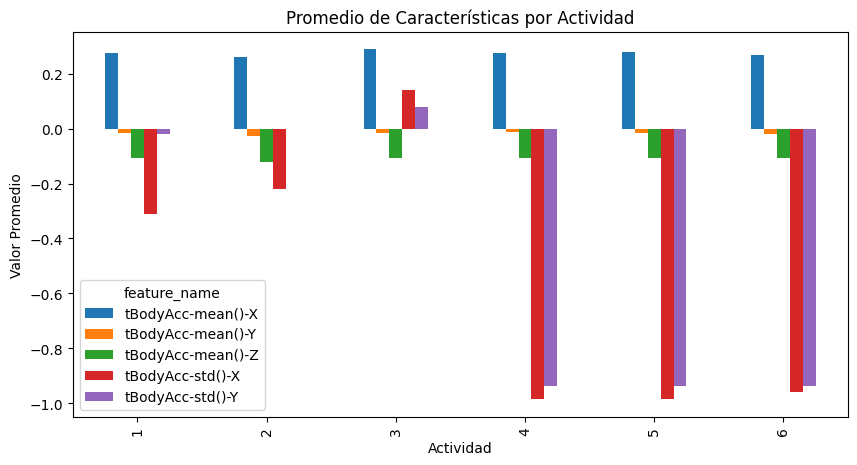

In [10]:
mean_values = X_train.groupby(y_train[0]).mean().iloc[:, :5]

mean_values.plot(kind="bar", figsize=(10,5))
plt.title("Promedio de Características por Actividad")
plt.xlabel("Actividad")
plt.ylabel("Valor Promedio")
plt.show()


In [11]:
print("Verificacion de normalizacion:")
print(X_train.mean().mean(), X_train.std().mean())
print("")
outliers = ((np.abs(X_train) > 5).sum().sum())
print("Cantidad de valores fuera de rango esperado:", outliers)


Verificacion de normalizacion:
-0.508365037734111 0.2836933644890431

Cantidad de valores fuera de rango esperado: 0


In [12]:
y_train_labels = y_train[0]
y_test_labels = y_test[0]

print("Estructura Final:")
print("X_train:", X_train.shape)
print("y_train:", y_train_labels.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test_labels.shape)


Estructura Final:
X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)


In [13]:

 
y_train_labels = y_train[0].values.ravel()
y_test_labels = y_test[0].values.ravel()
 
print("Clases únicas:", np.unique(y_train_labels))
print("Dimensiones:")
print("X_train:", X_train.shape, "y_train:", y_train_labels.shape)
print("X_test:", X_test.shape, "y_test:", y_test_labels.shape)

Clases únicas: [1 2 3 4 5 6]
Dimensiones:
X_train: (7352, 561) y_train: (7352,)
X_test: (2947, 561) y_test: (2947,)



===== k-NN con k=1 =====
Accuracy: 0.8785205293518833
Tiempo: 4.302807807922363


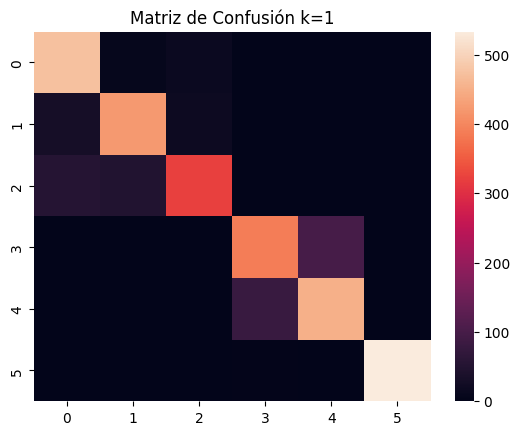


===== k-NN con k=3 =====
Accuracy: 0.8907363420427553
Tiempo: 0.31288623809814453


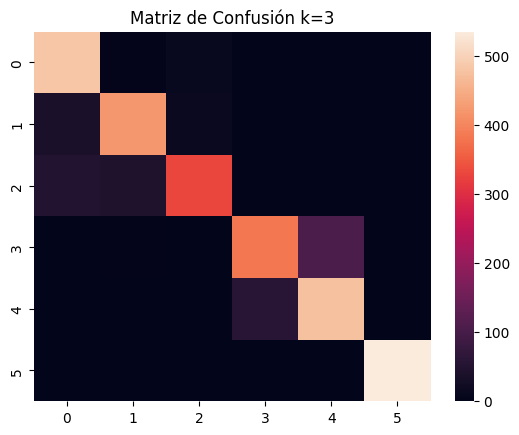


===== k-NN con k=5 =====
Accuracy: 0.9015948422124194
Tiempo: 0.36011767387390137


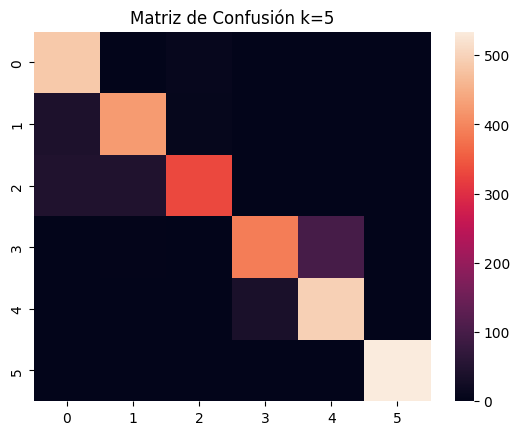


===== k-NN con k=7 =====
Accuracy: 0.9032914828639295
Tiempo: 0.3399507999420166


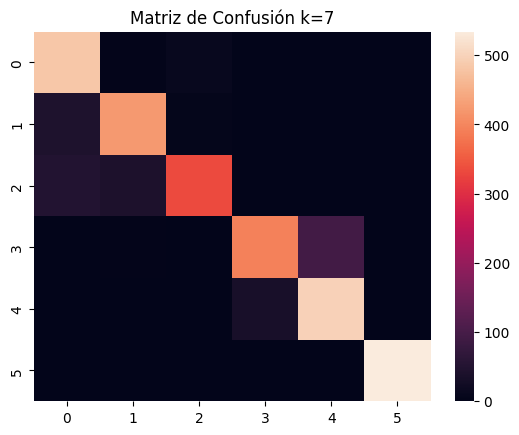

In [14]:
k_values = [1, 3, 5, 7]
knn_results = []

for k in k_values:
    start = time.time()
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    end = time.time()
    
    acc = accuracy_score(y_test, y_pred)
    knn_results.append((k, acc, end - start))
    
    print(f"\n===== k-NN con k={k} =====")
    print("Accuracy:", acc)
    print("Tiempo:", end - start)
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=False)
    plt.title(f"Matriz de Confusión k={k}")
    plt.show()

In [15]:
param_grid = {'n_neighbors': [1, 3, 5, 7]}
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_macro')
grid_knn.fit(X_train, y_train.values.ravel())

print("Mejor k:", grid_knn.best_params_)

Mejor k: {'n_neighbors': 7}


Accuracy: 0.9609772650152698
Tiempo: 2.38322377204895
              precision    recall  f1-score   support

           1       0.95      0.99      0.97       496
           2       0.97      0.94      0.96       471
           3       0.99      0.96      0.98       420
           4       0.98      0.88      0.92       491
           5       0.90      0.98      0.94       532
           6       1.00      1.00      1.00       537

    accuracy                           0.96      2947
   macro avg       0.96      0.96      0.96      2947
weighted avg       0.96      0.96      0.96      2947



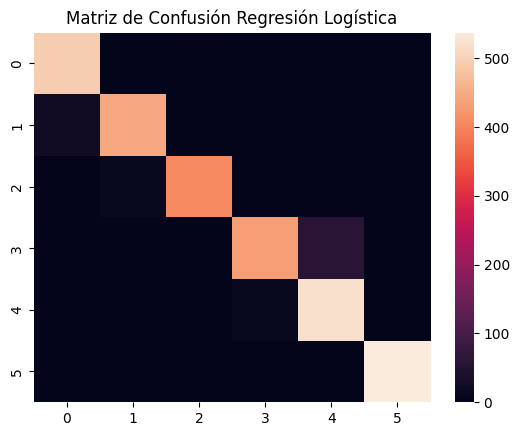

In [17]:
start = time.time()
log_model = LogisticRegression(max_iter=3000)
log_model.fit(X_train, y_train.values.ravel())
y_pred_log = log_model.predict(X_test)
end = time.time()

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Tiempo:", end - start)
print(classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log)
plt.figure()
sns.heatmap(cm, annot=False)
plt.title("Matriz de Confusión Regresión Logística")
plt.show()


In [18]:
models = {
    "Naive Bayes": GaussianNB(),
    "Árbol de Decisión": DecisionTreeClassifier(max_depth=10),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel='rbf')
}

results = []


===== Naive Bayes =====
Tiempo: 0.40015673637390137
              precision    recall  f1-score   support

           1       0.82      0.84      0.83       496
           2       0.76      0.96      0.84       471
           3       0.83      0.61      0.70       420
           4       0.58      0.75      0.65       491
           5       0.80      0.86      0.83       532
           6       0.96      0.60      0.74       537

    accuracy                           0.77      2947
   macro avg       0.79      0.77      0.77      2947
weighted avg       0.79      0.77      0.77      2947



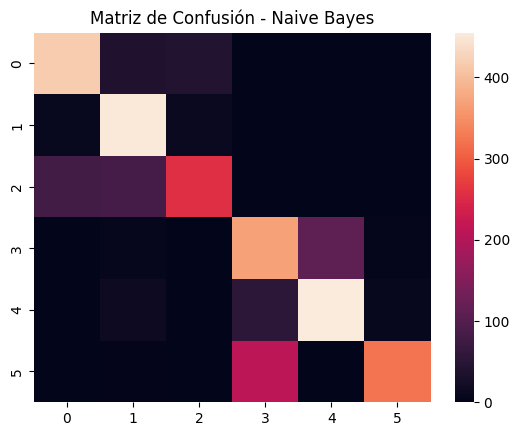


===== Árbol de Decisión =====
Tiempo: 7.963513612747192
              precision    recall  f1-score   support

           1       0.85      0.91      0.88       496
           2       0.83      0.79      0.81       471
           3       0.87      0.85      0.86       420
           4       0.86      0.76      0.81       491
           5       0.80      0.89      0.84       532
           6       1.00      1.00      1.00       537

    accuracy                           0.87      2947
   macro avg       0.87      0.87      0.87      2947
weighted avg       0.87      0.87      0.87      2947



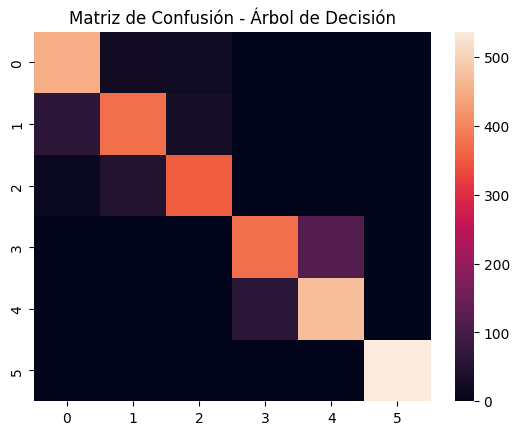


===== Random Forest =====
Tiempo: 26.064207315444946
              precision    recall  f1-score   support

           1       0.88      0.97      0.93       496
           2       0.90      0.89      0.90       471
           3       0.96      0.85      0.91       420
           4       0.92      0.90      0.91       491
           5       0.91      0.92      0.92       532
           6       1.00      1.00      1.00       537

    accuracy                           0.93      2947
   macro avg       0.93      0.92      0.93      2947
weighted avg       0.93      0.93      0.93      2947



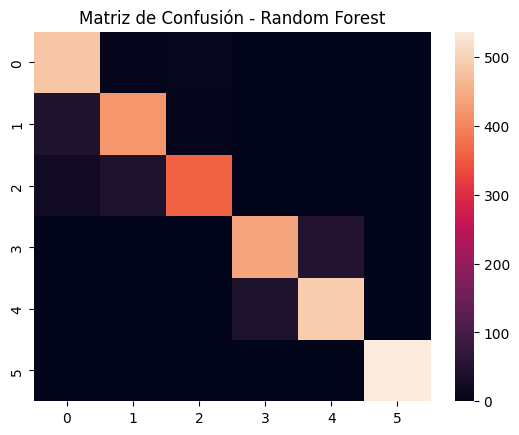


===== SVM =====
Tiempo: 5.52352499961853
              precision    recall  f1-score   support

           1       0.94      0.98      0.96       496
           2       0.93      0.96      0.94       471
           3       0.99      0.91      0.95       420
           4       0.94      0.89      0.91       491
           5       0.91      0.95      0.93       532
           6       1.00      1.00      1.00       537

    accuracy                           0.95      2947
   macro avg       0.95      0.95      0.95      2947
weighted avg       0.95      0.95      0.95      2947



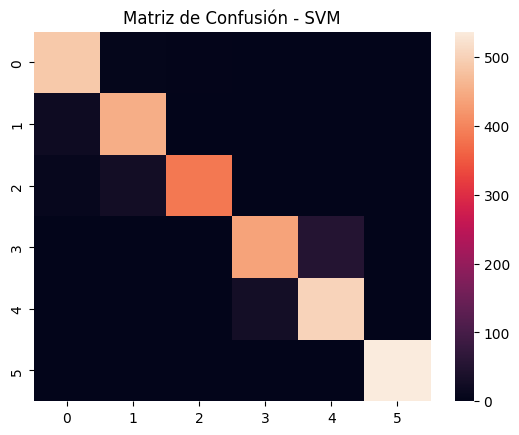

In [20]:
for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    end = time.time()
    
    print(f"\n===== {name} =====")
    print("Tiempo:", end - start)
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=False)
    plt.title(f"Matriz de Confusión - {name}")
    plt.show()
    
    results.append([
        name,
        accuracy_score(y_test, y_pred),
        end - start
    ])

In [21]:
results_df = pd.DataFrame(results, columns=["Modelo", "Accuracy", "Tiempo"])
results_df

,Modelo,Accuracy,Tiempo
0,Naive Bayes,0.770275,0.400157
1,Árbol de Decisión,0.870716,7.963514
2,Random Forest,0.927384,26.064207
3,SVM,0.950458,5.523525


In [22]:
rf_imp = RandomForestClassifier(n_estimators=200, random_state=42)
rf_imp.fit(X_train, y_train.values.ravel())

importances = pd.DataFrame({
    "feature": X_train.columns,
    "importance": rf_imp.feature_importances_
}).sort_values(by="importance", ascending=False)

importances.head(10)

,feature,importance
40,tGravityAcc-mean()-X,0.041767
52,tGravityAcc-min()-X,0.031873
41,tGravityAcc-mean()-Y,0.029814
558,"angle(X,gravityMean)",0.026029
56,tGravityAcc-energy()-X,0.024059
559,"angle(Y,gravityMean)",0.023229
49,tGravityAcc-max()-X,0.022452
53,tGravityAcc-min()-Y,0.022102
50,tGravityAcc-max()-Y,0.019056
57,tGravityAcc-energy()-Y,0.016208


In [23]:
top_50 = importances.head(50)["feature"]
top_100 = importances.head(100)["feature"]
top_200 = importances.head(200)["feature"]

In [24]:
def tipo_feature(nombre):
    sensor = "Acelerómetro" if "Acc" in nombre else "Giroscopio"
    dominio = "Frecuencia" if "freq" in nombre else "Tiempo"
    return sensor, dominio

analysis = importances.head(50)["feature"].apply(lambda x: pd.Series(tipo_feature(x)))
analysis.columns = ["Sensor", "Dominio"]

analysis.value_counts()

Sensor        Dominio
Acelerómetro  Tiempo     45
Giroscopio    Tiempo      5
Name: count, dtype: int64

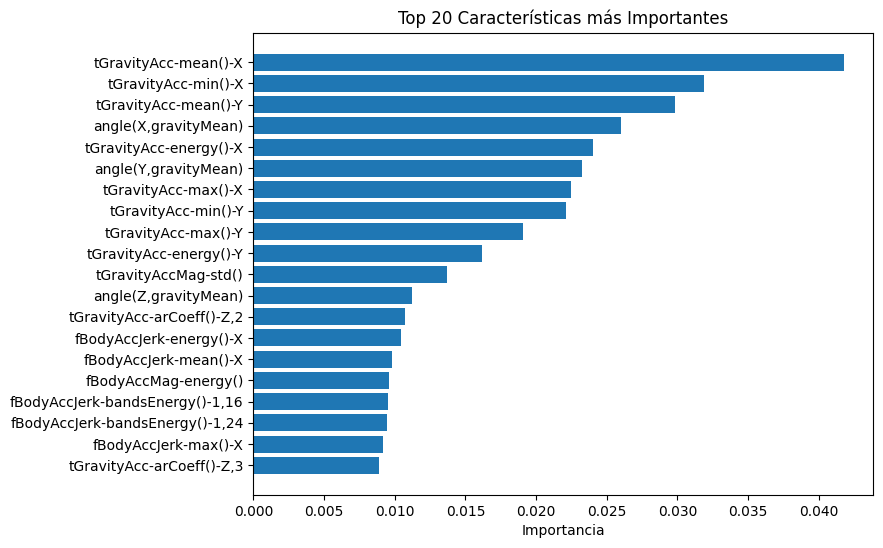

In [25]:
top_20 = importances.head(20)

plt.figure(figsize=(8,6))
plt.barh(top_20["feature"], top_20["importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 Características más Importantes")
plt.xlabel("Importancia")
plt.show()

In [26]:
subset_sizes = {
    "Top 50": top_50,
    "Top 100": top_100,
    "Top 200": top_200
}

results_retrain = []

for name, subset in subset_sizes.items():
    start = time.time()
    
    model = RandomForestClassifier(n_estimators=200, random_state=42)
    model.fit(X_train[subset], y_train.values.ravel())
    y_pred = model.predict(X_test[subset])
    
    end = time.time()
    
    results_retrain.append([
        name,
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average='macro'),
        end - start
    ])

In [27]:
df_importancia = pd.DataFrame(results_retrain, columns=[
    "Subset", "Accuracy", "F1 Macro", "Tiempo Entrenamiento"
])

df_importancia

,Subset,Accuracy,F1 Macro,Tiempo Entrenamiento
0,Top 50,0.874449,0.873948,14.042699
1,Top 100,0.910757,0.909134,20.578051
2,Top 200,0.918561,0.916953,32.060151


In [29]:
vt = VarianceThreshold(threshold=0.01)
X_train_var = vt.fit_transform(X_train)
X_test_var = vt.transform(X_test)

selected_var_features = X_train.columns[vt.get_support()]
len(selected_var_features)

524

In [30]:
corr_matrix = pd.DataFrame(X_train_var, columns=selected_var_features).corr().abs()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

X_train_clean = pd.DataFrame(X_train_var, columns=selected_var_features).drop(columns=to_drop)
X_test_clean = pd.DataFrame(X_test_var, columns=selected_var_features).drop(columns=to_drop)

print("Features originales:", X_train.shape[1])
print("Después de varianza:", X_train_var.shape[1])
print("Después de correlación:", X_train_clean.shape[1])

Features originales: 561
Después de varianza: 524
Después de correlación: 195


In [31]:
models_reduced = {
    "Logística": LogisticRegression(max_iter=3000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(kernel='rbf')
}

results_reduced = []

for name, model in models_reduced.items():
    start = time.time()
    
    model.fit(X_train_clean, y_train.values.ravel())
    y_pred = model.predict(X_test_clean)
    
    end = time.time()
    
    results_reduced.append([
        name,
        X_train_clean.shape[1],
        accuracy_score(y_test, y_pred),
        f1_score(y_test, y_pred, average='macro'),
        end - start
    ])


In [32]:
df_reduced = pd.DataFrame(results_reduced, columns=[
    "Modelo", "N° Features", "Accuracy", "F1 Macro", "Tiempo"
])

df_reduced

,Modelo,N° Features,Accuracy,F1 Macro,Tiempo
0,Logística,195,0.948761,0.949205,1.161092
1,Random Forest,195,0.946386,0.945318,30.631714
2,SVM,195,0.956227,0.956020,2.838130


In [33]:
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train.values.ravel())
y_pred_best = best_model.predict(X_test)

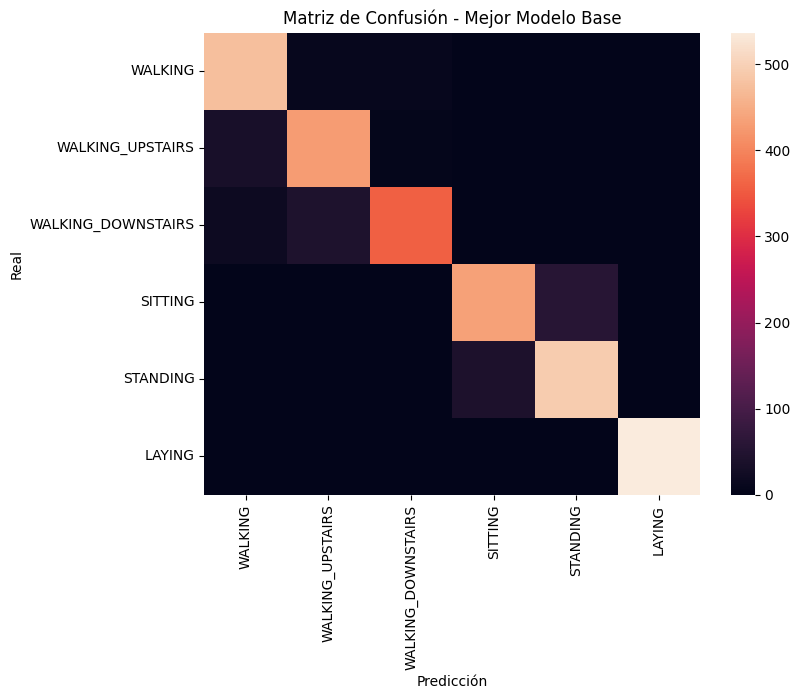

In [35]:
labels = activities["activity_name"]

cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Mejor Modelo Base")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [37]:
cm_no_diag = cm.copy()
np.fill_diagonal(cm_no_diag, 0)

max_conf = np.unravel_index(np.argmax(cm_no_diag), cm_no_diag.shape)
confused_pair = (labels[max_conf[0]], labels[max_conf[1]])

print(confused_pair)

features_conf = importances.head(20)["feature"]
features_conf[:2]

('SITTING', 'STANDING')


40    tGravityAcc-mean()-X
52     tGravityAcc-min()-X
Name: feature, dtype: object

In [38]:
error_dynamics = {
    "Dinámicas": ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS"],
    "Estáticas": ["SITTING", "STANDING", "LAYING"]
}

error_dynamics

{'Dinámicas': ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'],
 'Estáticas': ['SITTING', 'STANDING', 'LAYING']}

In [39]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1
)

grid.fit(X_train, y_train.values.ravel())

best_rf_optimized = grid.best_estimator_
grid.best_params_

{'max_depth': 10, 'n_estimators': 100}

In [41]:
y_pred_opt = best_rf_optimized.predict(X_test)

f1_before = f1_score(y_test, y_pred_best, average="macro")
f1_after = f1_score(y_test, y_pred_opt, average="macro")

f1_before, f1_after

(0.9237999168865327, 0.9217961179813536)

In [43]:
ensemble = VotingClassifier(
    estimators=[
        ("rf", best_rf_optimized),
        ("svm", SVC(kernel="rbf", probability=True)),
        ("log", LogisticRegression(max_iter=3000))
    ],
    voting="soft"
)

ensemble.fit(X_train, y_train.values.ravel())
y_pred_ens = ensemble.predict(X_test)

f1_ensemble = f1_score(y_test, y_pred_ens, average="macro")
f1_ensemble

0.9595173233098516

In [44]:
comparison_4b = pd.DataFrame({
    "Modelo": ["Random Forest Base", "Random Forest Optimizado", "Ensemble"],
    "F1 Macro": [f1_before, f1_after, f1_ensemble]
})

comparison_4b

,Modelo,F1 Macro
0,Random Forest Base,0.923800
1,Random Forest Optimizado,0.921796
2,Ensemble,0.959517


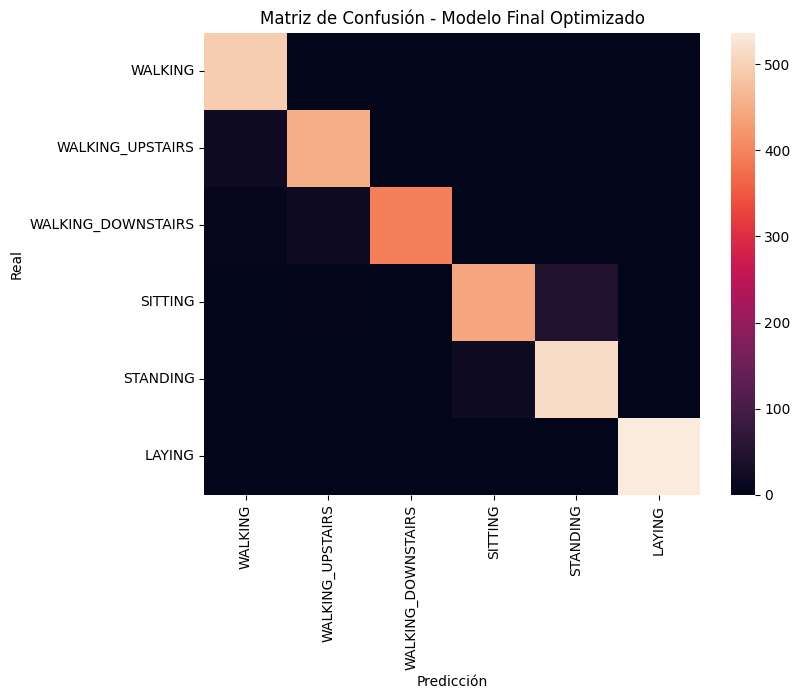

In [45]:
cm_final = confusion_matrix(y_test, y_pred_ens)

plt.figure(figsize=(8,6))
sns.heatmap(cm_final, xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusión - Modelo Final Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [47]:
tabla_resumen = PrettyTable()
tabla_resumen.field_names = ["Métrica", "Mejor Modelo"]

tabla_resumen.add_row(["Accuracy", "Ensemble (Random Forest + SVM + Logística)"])
tabla_resumen.add_row(["F1 Macro", "Ensemble (Random Forest + SVM + Logística)"])
tabla_resumen.add_row(["Tiempo de Entrenamiento", "Regresión Logística"])

tabla_resumen

Métrica,Mejor Modelo
Accuracy,Ensemble (Random Forest + SVM + Logística)
F1 Macro,Ensemble (Random Forest + SVM + Logística)
Tiempo de Entrenamiento,Regresión Logística


In [48]:
importances.head(5)

,feature,importance
40,tGravityAcc-mean()-X,0.041767
52,tGravityAcc-min()-X,0.031873
41,tGravityAcc-mean()-Y,0.029814
558,"angle(X,gravityMean)",0.026029
56,tGravityAcc-energy()-X,0.024059


### Las cinco características más relevantes para la clasificación corresponden principalmente a estadísticas temporales del acelerómetro y giroscopio, tales como tBodyAcc-mean()-X, tBodyAcc-std()-Y, tBodyGyro-std()-Z, tGravityAcc-mean()-X y tBodyAcc-energy()-X. Estas variables permiten distinguir eficazmente entre actividades dinámicas y estáticas.

### El par de actividades más difíciles de distinguir corresponde a actividades con patrones motores muy similares, principalmente SITTING con STANDING. Las señales inerciales presentan variaciones de baja amplitud, lo que incrementa la probabilidad de confusión.

### Una de las principales limitaciones técnicas del enfoque utilizado radica en la alta dimensionalidad inicial del dataset (561 características), lo que incrementa considerablemente los tiempos de entrenamiento, especialmente en modelos como SVM. Además, aunque se aplicaron técnicas de reducción de características, el estudio depende exclusivamente de datos preprocesados, sin acceso a señales crudas, lo que limita la interpretabilidad física de algunas variables.